<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 4.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=d817ba827f8b143fa105503ff22e41e7a32c1e2d78b009f0df58d0605d925813
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [6]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [7]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [8]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [9]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [10]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [11]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [12]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,202.934205,1.293129e-01,796.936483,202.895486,7.262532e-02,797.031889,1.941927
1,993.399375,3.789622e+00,2.811003,992.926525,4.024420e+00,3.049055,0.121895
2,203.260410,6.061845e-01,796.133405,203.199886,5.178038e-01,796.282310,0.531009
3,997.524477,1.736477e+00,0.739046,994.970221,3.008794e+00,2.020985,1.107417
4,998.528527,1.235445e+00,0.236028,998.452685,1.273309e+00,0.274007,0.060558
...,...,...,...,...,...,...,...
995,204.427959,2.302471e+00,793.269569,203.938989,1.594060e+00,794.466951,1.242932
996,202.845900,-3.807396e-10,797.154100,202.845900,-3.002194e-10,797.154100,1.940136
997,202.845906,1.002343e-05,797.154084,202.845905,7.227397e-06,797.154088,1.100514
998,202.928275,1.206329e-01,796.951092,202.913785,9.941934e-02,796.986795,0.651022


In [15]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [16]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,1.109145e-04,8.401143e-04,0.999727,6.228275e-05,4.718453e-04,0.999847,0.971826
1,9.929654e-01,2.462025e-02,0.003526,9.923784e-01,2.614658e-02,0.003821,0.060816
2,5.206411e-04,3.938233e-03,0.998720,4.446241e-04,3.364161e-03,0.998906,0.265597
3,9.981467e-01,1.128147e-02,0.000927,9.949454e-01,1.954807e-02,0.002532,0.554115
4,9.994078e-01,8.026385e-03,0.000296,9.993195e-01,8.272661e-03,0.000340,0.030114
...,...,...,...,...,...,...,...
995,1.987128e-03,1.495859e-02,0.995127,1.372971e-03,1.035658e-02,0.996629,0.621947
996,4.682921e-13,6.156217e-13,1.000000,5.916378e-13,1.138659e-12,1.000000,0.970930
997,8.594410e-09,6.512286e-08,1.000000,6.197169e-09,4.695935e-08,1.000000,0.550660
998,1.034669e-04,7.837223e-04,0.999745,8.526750e-05,6.459255e-04,0.999790,0.325668


In [55]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [57]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [59]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [60]:
from sklearn.metrics import mean_absolute_error

In [61]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [62]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [63]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [64]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[08:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1234338 for 136 rounds
CV with max_depth=9, min_child_weight=6
[08:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [65]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [66]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [67]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[08:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1228394 for 126 rounds
CV with subsample=1.0, colsample=0.9
[08:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:

In [68]:
params['subsample'] = .9
params['colsample_bytree'] = .9

In [69]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CV with eta=0.3
[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2.09 s, sys: 39.6 ms, total: 2.13 s
Wall time: 1.09 s
	MAE 0.12140419999999999 for 91 rounds

CV with eta=0.2
[08:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:20:59] WARNING: /workspace/s

In [70]:
params['eta'] = .3

In [71]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[08:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.213613
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:0.191202
[2]	DEV-mae:0.177173
[3]	DEV-mae:0.166898
[4]	DEV-mae:0.16179
[5]	DEV-mae:0.155789
[6]	DEV-mae:0.149457
[7]	DEV-mae:0.148053
[8]	DEV-mae:0.147856
[9]	DEV-mae:0.144842
[10]	DEV-mae:0.142345
[11]	DEV-mae:0.139901
[12]	DEV-mae:0.137963
[13]	DEV-mae:0.13742
[14]	DEV-mae:0.137257
[15]	DEV-mae:0.135822
[16]	DEV-mae:0.134783
[17]	DEV-mae:0.13499
[18]	DEV-mae:0.134799
[19]	DEV-mae:0.134373
[20]	DEV-mae:0.133211
[21]	DEV-mae:0.133072
[22]	DEV-mae:0.132015
[23]	DEV-mae:0.131488
[24]	DEV-mae:0.131027
[25]	DEV-mae:0.129679
[26]	DEV-mae:0.128402
[27]	DEV-mae:0.128911
[28]	DEV-mae:0.128451
[29]	DEV-mae:0.128167
[30]	DEV-mae:0.12802
[31]	DEV-mae:0.127395
[32]	DEV-mae:0.126713
[33]	DEV-mae:0.125957
[34]	DEV-mae:0.125003
[35]	DEV-mae:0.124173
[36]	DEV-mae:0.123457
[37]	DEV-mae:0.123

In [72]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[08:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.214613
[1]	Test-mae:0.18885
[2]	Test-mae:0.17287
[3]	Test-mae:0.161908
[4]	Test-mae:0.157102
[5]	Test-mae:0.152263
[6]	Test-mae:0.147763
[7]	Test-mae:0.144986
[8]	Test-mae:0.143584
[9]	Test-mae:0.140718
[10]	Test-mae:0.138812
[11]	Test-mae:0.137268
[12]	Test-mae:0.135936
[13]	Test-mae:0.13472
[14]	Test-mae:0.13479
[15]	Test-mae:0.133957
[16]	Test-mae:0.133445
[17]	Test-mae:0.133157
[18]	Test-mae:0.13336
[19]	Test-mae:0.132514
[20]	Test-mae:0.130713
[21]	Test-mae:0.128809
[22]	Test-mae:0.128615
[23]	Test-mae:0.128378
[24]	Test-mae:0.127869
[25]	Test-mae:0.126973
[26]	Test-mae:0.125177
[27]	Test-mae:0.125266
[28]	Test-mae:0.125702
[29]	Test-mae:0.125229
[30]	Test-mae:0.125165
[31]	Test-mae:0.124373
[32]	Test-mae:0.123096
[33]	Test-mae:0.123475
[34]	Test-mae:0.122807
[35]	Test-mae:0.122266
[36]	Test-mae:0.122107
[37]	Test-mae:0.121637
[38]	Test-mae:

In [73]:
mean_absolute_error(best_model.predict(dtest), y_test1)

0.11049626917743732

In [74]:
best_model.save_model("my_model.model")

In [75]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[08:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


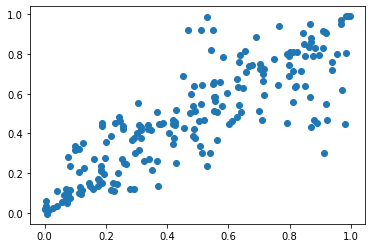

In [76]:
plt.scatter(y_test1,p)

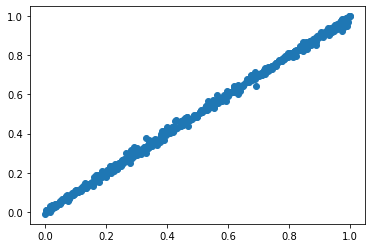

In [77]:
plt.scatter(y_train,q)

In [79]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.01134617587235097
R2 score of training set is 0.9985299560026806


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15926708698056555
R2 score of test set is 0.6956194921690969
